<h3 style="text-align:center;">Semantic Primes Project</h3>

<p>In this cell we are training a word2vec model on all English words.</p>

In [1]:
import nltk
print(nltk.__version__)
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
nltk.download('words')
nltk.download('punkt')
import os

#stores every word in english dictionary into a list called 'words'. It imports strings so we have to tokenize them
words = nltk.corpus.words.words()

#tokenizing the words - puts them into individual words so we can vectorize them, this is a list of lists
tokenized_words = [word_tokenize(word) for word in words]

#testing output of some tokenized_words
count = 0
for word in tokenized_words:
    print(word)
    count += 1
    if count >= 10:
        break

#list comprehension checks if its alphabetic with isalpha(), and if its lowercase with lower()
#the preprocessing of the words cleans them so that they can be effectively used in nlp
#the use of a nesting list comprehension is to ensure that we can use word.lower because an inner loop will only contain strings of the sublists from the outer loop
processed_words = [[word.lower() for word in words if word.lower().isalpha()] for words in tokenized_words]

#training the model, min_count=1 ensures that each word appear one time only
#wordtovec maps words to their vector representation
#wordtovec is a neural network, each word is a neuron, probability correction improves overtime
wordToVecModel = Word2Vec(processed_words, min_count=1)

#creating a file with all the words in wordtovec and making sure we dont append to it if already created.
if os.path.isfile('all_words_in_wordToVec_model.txt'):
    print("File already exists, no new data can be added.")
else:
    with open('all_words_in_wordToVec_model.txt', 'w') as f:
        for word in wordToVecModel.wv.key_to_index:
            f.write("%s\n" % word)

3.8.1


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['A']
['a']
['aa']
['aal']
['aalii']
['aam']
['Aani']
['aardvark']
['aardwolf']
['Aaron']
File already exists, no new data can be added.


In [2]:
import gensim
print(gensim.__version__)

4.3.0


In [3]:
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def findKNearestNeighbor(wordInput, numNeighbors = 5):

    
    #if word is in the wordtovec model...
    #wv.key_to_index contains words as keys and index as values
    if wordInput in wordToVecModel.wv.key_to_index:
    #first get vector representation of the word that we input so that we can...
    #now find the cosine similarities of this and all other words to perform KNN algorithm
    #cosine similarities are essential in natural language processing, they are performed on vectors
        word_vector = wordToVecModel.wv.get_vector(wordInput)
        print("Input word is PRESENT in model vocabulary.")
    # word not found
    else:
        print("Input word NOT found in model vocabulary.")
        return [] #returns an empty list if the word is not found to prevent exceptions
        
    #this is all the vectors inside the wordToVecModel that we created containing every english word
    all_word_vectors = wordToVecModel.wv.vectors
    
    #we are going to pass in the number of neighbors below.
    #metric is the distance metric, we are using cosine as the distance metric to find similarities
    #model is being trained on the variable 'all_word_vectors'
    neighbors = NearestNeighbors(n_neighbors = numNeighbors, metric='cosine').fit(all_word_vectors)

    # kneighbors returns a 2d array with the distances and the indices. 
    # distances is index 0 / [0]
    # indices is index 1 / [1]
    #storing this info in the variable 'nearest_neighbors_info'
    nearest_neighbors_info = neighbors.kneighbors([word_vector])

    #extracting the information and storing it into two variables 
    # 'distances' variable tells us how far each of the most similar words are from the input word in terms of cosine similarity. 
    #distances = nearest_neighbors_info[0]

    #indices is referring to the closest indices to the input word
    indices = nearest_neighbors_info[1]

    #list comprehension
    # get the most similar words and putting them in list of strings
    #we have to remove the input word because we dont want it as a kneighbor
    similar_words = [wordToVecModel.wv.index_to_key[i] for i in indices[0] if wordToVecModel.wv.index_to_key != wordInput]

    return similar_words

In [4]:
input = "angry"
similar_words = findKNearestNeighbor(input, 10)
print(similar_words)


Input word is PRESENT in model vocabulary.
['angry', 'temperate', 'boatowner', 'quitu', 'antiketogenic', 'warwick', 'presufficient', 'forced', 'dextrality', 'witchcraft']


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plotWordVectors(wordInput):
    #getting the vector for the input word
    word_vector = wordToVecModel.wv.get_vector(wordInput)
    #getting vectors for similar words with list comprehension
    similar_words_vectors = [wordToVecModel.wv.get_vector(i) for i in similar_words]
    #putting the vectors into a 2d matrix to prepare for pca - they need to be a matrix which is what we are doing here
    vectors = np.vstack([word_vector] + similar_words_vectors)

    # Apply PCA to reduce dimensions to 2D so that we can visualize it on the plot
    #the components are the 2d vectors from np.vstack above
    pca = PCA(n_components=2)
    components = pca.fit_transform(vectors)

    # Create scatter plot - plt.scatter(x coordinate, y coordinate)
        #(all rows, first column ,  all rows, second column)
    plt.scatter(components[:, 0], components[:, 1]) 
    #'s' is referring to the marker size
    plt.scatter(components[0, 0], components[0, 1], marker='*', s=200, color='red') #here we plotting the target word from word_vector

    # Add labels to points
    for i, w in enumerate([wordInput] + similar_words):
        plt.annotate(w, xy=(components[i, 0], components[i, 1]))

    # Set plot title
    plt.title("KNN Plot for Word - " + input)

    plt.show()


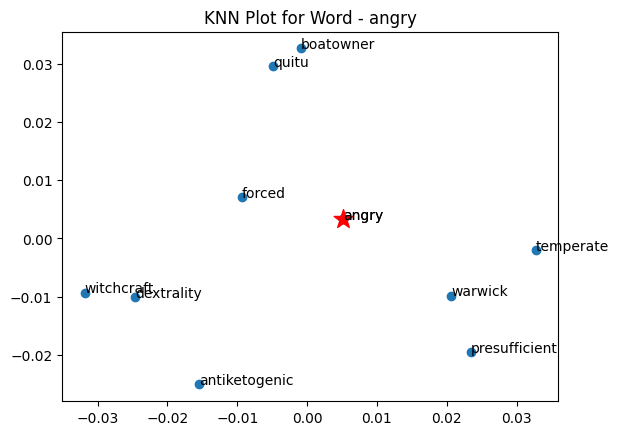

In [6]:
plotWordVectors(input)

In [7]:
#creating file for all  words

filename = "allwords.txt"

file = open(filename, "a")

#converting all the words from corpus to string fo`rmat so we can put in file
words_str = str(words)

#saving to file
file.write(words_str)

file.flush()
file.close

<function TextIOWrapper.close()>

In [8]:
#creating file for all processed words

filename = "allprocessedwords.txt"

file = open(filename, "a")

#converting all the tokenized words to string format so we can put in file
processed_words_str = str(processed_words)

#saving to file
file.write(processed_words_str)

file.flush()
file.close

<function TextIOWrapper.close()>

In [9]:
#creating file for all tokenized words

filename = "alltokenizedwords.txt"

file = open(filename, "a")

#converting all the tokenized words to string format so we can put in file
tokenized_words_str = str(tokenized_words)

#saving to file
file.write(tokenized_words_str)

file.flush()
file.close

<function TextIOWrapper.close()>